<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

### 1. Implementa la función para el SEE (en clase)
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [11]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat)**2) 


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [12]:
import numpy as np
from scipy.linalg import svd

def svm(X):    
    U,s, Vt = np.linalg.svd(X, full_matrices = False)
    S = np.diag(s)
    return U, S, Vt # S es una matriz diagonal

### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [13]:
def reconstruction(U, S, Vt):
    # TODO Define la función
    return np.dot(U,np.dot(S, Vt))

### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [15]:
def image_compression(A, n_comp):
    """
    Función que recibe una imagen A, devuelve la imagen comprimida y el error de reconstrucción
    """
    U, S, Vt = svm(A)
    
    S_reducida = S[0:n_comp,0:n_comp] # Si necesitamos redimensionar la matriz: reshape(n_comp,n_comp)
    U_reducida = U[:,0:n_comp] # Si necesitamos redimensionar la matriz: reshape(768,n_comp)
    Vt_reducida = Vt[0:n_comp,:] # Si necesitamos redimensionar la matriz: reshape(n_comp, 1024)

    A_hat = reconstruction(U_reducida, S_reducida ,Vt_reducida)

    sse = sse_score(A, A_hat)
    
    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

In [29]:
import matplotlib.pyplot as plt
from scipy import  datasets

def graficas_ima_compri(comp1=780,comp2=300,comp3=50,comp4=15,comp5=8):
    """
    Muestra las imágenes resultantes de aplicar el algoritmo de 
    Singular Value Decomposition para comprimir una imagen, con sus valores de error.
    Estamos analizando la imagen datasets.face.
    Recibe 5 valores que por defecto son (780,  300, 50, 15, 8)
    """
    comprs=[comp1,comp2,comp3,comp4,comp5] #Lista con las opciones de compresion
    racoon = datasets.face(gray=True)
    
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7.68,10.24))
    fig.suptitle('IMAGENES \n Vs: Valores singulares\n E: Error de reconstrucción')

    k=0
    for i in range(3):
        for j  in range(2):
            if i==0 and j==0:
                axs[i, j].imshow(racoon, cmap=plt.cm.gray)
                axs[i, j].set_title('Imagen Original')
            else:    
                racoon_hat, sse = image_compression(racoon, comprs[k])
                axs[i, j].imshow(racoon_hat, cmap=plt.cm.gray)
                axs[i, j].set_title(f"Vs:  {comprs[k]} \n E: {sse:.1e}")
                k+=1
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()
    return None

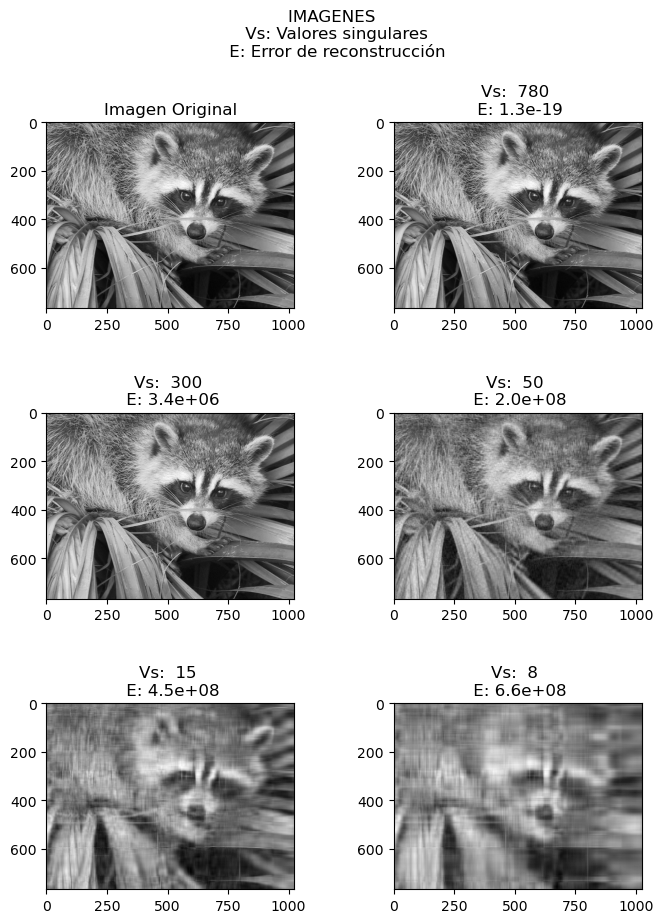

In [30]:
graficas_ima_compri()